### importing needed libraries

In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from collections import Counter

In [2]:
#creating dataset
def make_forge():
    X, y = make_blobs(centers=2, random_state=4, n_samples=30)
    y[np.array([7, 27])] = 0
    mask = np.ones(len(X), dtype=np.bool)
    mask[np.array([0, 1, 5, 26])] = 0
    X, y = X[mask], y[mask]
    return X, y
X, y = make_forge()

<ipython-input-2-00910e3182e6>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.ones(len(X), dtype=np.bool)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1234, test_size=0.2)

In [4]:
X_train

array([[ 8.30988863,  4.80623966],
       [ 8.1062269 ,  4.28695977],
       [ 9.96346605,  4.59676542],
       [ 8.34810316,  5.13415623],
       [ 8.92229526, -0.63993225],
       [ 9.50169345,  1.93824624],
       [ 9.17748385,  5.09283177],
       [ 9.15072323,  5.49832246],
       [ 8.34468785,  1.63824349],
       [ 9.49123469,  4.33224792],
       [10.24028948,  2.45544401],
       [ 8.67494727,  4.47573059],
       [ 8.18378052,  1.29564214],
       [11.563957  ,  1.3389402 ],
       [10.06393839,  0.99078055],
       [ 8.68937095,  1.48709629],
       [ 9.50048972, -0.26430318],
       [11.93027136,  4.64866327],
       [ 9.32298256,  5.09840649],
       [ 9.25694192,  5.13284858]])

In [5]:
X_test

array([[ 9.67284681, -0.20283165],
       [ 7.99815287,  4.8525051 ],
       [11.54155807,  5.21116083],
       [ 8.69289001,  1.54322016],
       [11.0329545 , -0.16816717],
       [ 8.7337095 ,  2.49162431]])

In [6]:
y_train

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [7]:
y_test

array([0, 1, 1, 0, 0, 0])

###  Implementation of my version of the KNN classifier


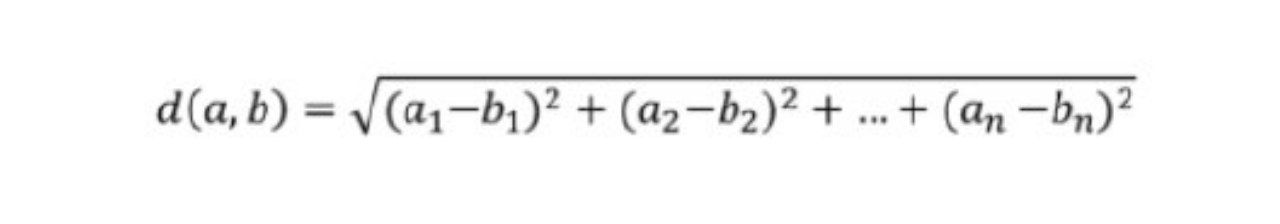

In [8]:
def euc_dist(x1 , x2):
#calculating the distance by this formula
    return np.sqrt(np.sum((x1-x2)**2))

class Knn():
    def __init__(self,k=3):
        self.k = k
        

    def fit(self,X,y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X):
        pr_labels = [self._predict(i) for i in X]
        return np.array(pr_labels)
    
    def _predict(self,i):
        distance = [euc_dist(i, x_train) for x_train in self.X_train]
        
        k_ind = np.argsort(distance)[:self.k]
        nearest_l = [self.y_train[i] for i in k_ind]
        
        common = Counter(nearest_l).most_common(1)
        return common[0][0]
    
if __name__ == "__main__":

    cmap = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy


    clf = Knn(k=3)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    print("KNN classification accuracy is ->", accuracy(y_test, predictions))

KNN classification accuracy is -> 1.0
